In [1]:
from unfold_utils.plot_tools import AsymmetricErrorPlot

In [13]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import hist
import mplhep as hep

In [14]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
title_list = [ r"$p_T$ 200-290 GeV",  r"$p_T$ 290-400 GeV",  r"$p_T$ 400-480 GeV",  r"$p_T$ 480-$\infty$ GeV"]
color_pt = ["#1f77b4", "#d62728", "#2ca02c", "#ff7f0e"]
groomed = 1

In [29]:
if not groomed:
    with open("total_sys_pt_dic_ungroomed.pkl", "rb") as f:
        total_sys_pt_dic = pkl.load(f)

    with open("total_sys_down_pt_dic_ungroomed.pkl", "rb") as f:
        total_sys_down_pt_dic = pkl.load(f)
    with open("unfolded_result_ungroomed.pkl", "rb") as f:
        unfolded_result = pkl.load(f)
    
    with open("total_stat_ungroomed.pkl", "rb") as f:
        stat_mat = pkl.load(f)
    
    with open("pythia_gen_ungroomed.pkl", "rb") as f:
        pythia = pkl.load( f)
else:
    with open("total_sys_pt_dic_groomed.pkl", "rb") as f:
        total_sys_pt_dic = pkl.load(f)
    with open("total_sys_down_pt_dic_groomed.pkl", "rb") as f:
        total_sys_down_pt_dic = pkl.load(f)
    with open("unfolded_result_groomed.pkl", "rb") as f:
        unfolded_result = pkl.load(f)
    
    with open("total_stat_groomed.pkl", "rb") as f:
        stat_mat = pkl.load(f)
    
    with open("pythia_gen_groomed.pkl", "rb") as f:
        pythia = pkl.load( f)

In [30]:
if not groomed:
    edges_gen = np.array([0,  20, 40, 60, 80, 100,
                          120, 140, 160, 200, 13000])
else:
    edges_gen = np.array([0, 10, 20, 40, 60, 80, 100,
                          120, 140, 160, 200, 13000])

# Compute bin widths
widths_gen = np.diff(edges_gen)

# Compute bin centers
centres_gen = (edges_gen[:-1] + edges_gen[1:]) / 2

In [31]:
if groomed:
    edges_gen_3 = np.array([0, 10, 20, 40, 80, 
                              120, 140, 160, 200, 13000])
    
    # Compute bin widths
    widths_gen_3 = np.diff(edges_gen_3)
    
    # Compute bin centers
    centres_gen_3 = (edges_gen_3[:-1] + edges_gen_3[1:]) / 2
else:
    edges_gen_3 = np.array([0,  20, 60, 80, 
                              120, 140, 160, 200, 13000])
    
    # Compute bin widths
    widths_gen_3 = np.diff(edges_gen_3)
    
    # Compute bin centers
    centres_gen_3 = (edges_gen_3[:-1] + edges_gen_3[1:]) / 2

In [32]:
x_data = [20, 40, 60, 80]
y_data = [100, 110, 120, 130]
y2_data = [101+20, 111+20, 121+20, 129+20]
x_widths = [20, 20, 20, 20]
stat_unc_up = [5, 5, 5, 5]
stat_unc_down = stat_unc_up
up = [10, 10, 10 , 10]
down = [10, 10, 10, 10]

In [33]:
plotter = AsymmetricErrorPlot()
plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=x_widths, y3_data = None)
plotter.add_stat_unc(stat_unc_up, stat_unc_down)
plotter.add_syst_unc(up, down)

4
4


In [34]:
total_unc_up = {}
total_unc_down = {}
for ipt in range(4):
    total_unc_up[ipt] =  np.sqrt(total_sys_pt_dic[ipt]**2 + stat_mat[ipt]**2)
    total_unc_down[ipt] =  np.sqrt(total_sys_down_pt_dic[ipt]**2 + stat_mat[ipt]**2)

11
11
widths before [   10    10    20    20    20    20    20    20    20    40 12800]
widths after [10 10 20 20 20 20 20 20 20 40 40]
masses len 11
 len values_data 11
xtick labels ['0', '', '20', '', '60', '', '100', '', '140', '', 200, '$\\infty$']
Ratio [ 1.20844158e+00  7.08428559e-01  8.31413402e-01  9.87709234e-01
  1.01644026e+00  7.99313814e-01  7.67631476e-01  6.58362301e-01
 -2.22831946e-01  1.12798608e-01 -9.76137435e-04]
Stat Ratio [ 1.22934515e-03  4.28369899e-03  2.55397597e-03  4.84335477e-03
  7.05710455e-03  1.31379187e-02  6.87494451e-02  1.43565938e-01
 -3.07419646e-01  5.68621498e-01 -1.57483819e+00]
Ratio Total Unc [ 0.03791073  0.0367538   0.03392846  0.03581537  0.0387885   0.04882541
  0.13253986  0.26509163 -0.71997345  0.95287611 -2.23827634]
11
11
widths before [   10    10    20    20    20    20    20    20    20    40 12800]
widths after [10 10 20 20 20 20 20 20 20 40 40]
masses len 11
 len values_data 11
xtick labels ['0', '', '20', '', '60', '', '100',

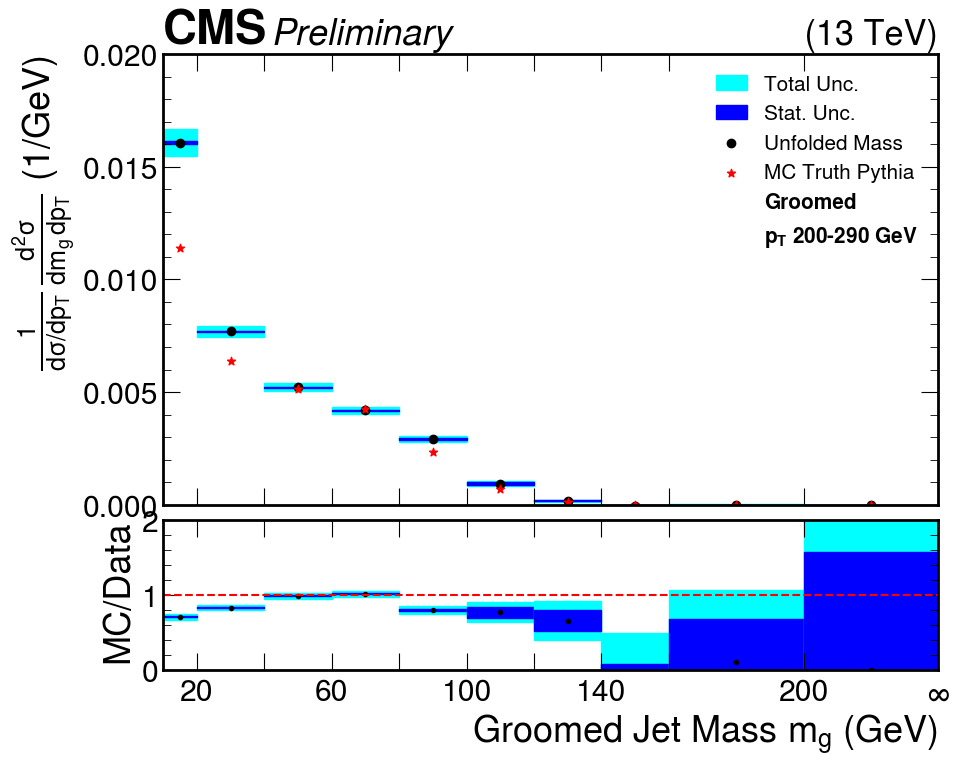

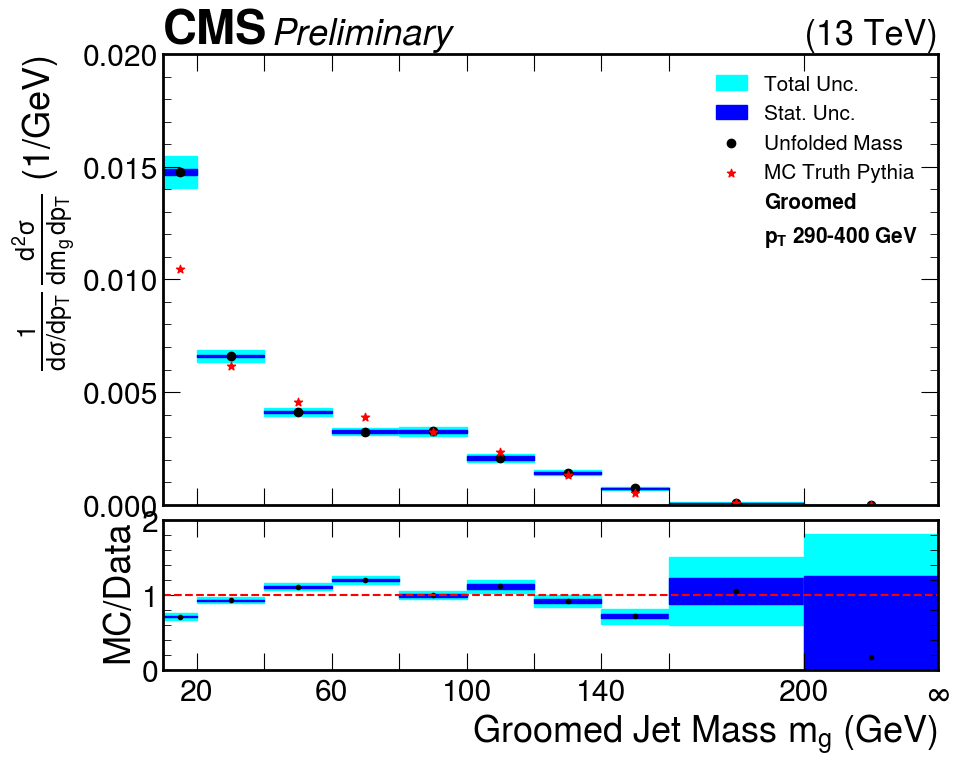

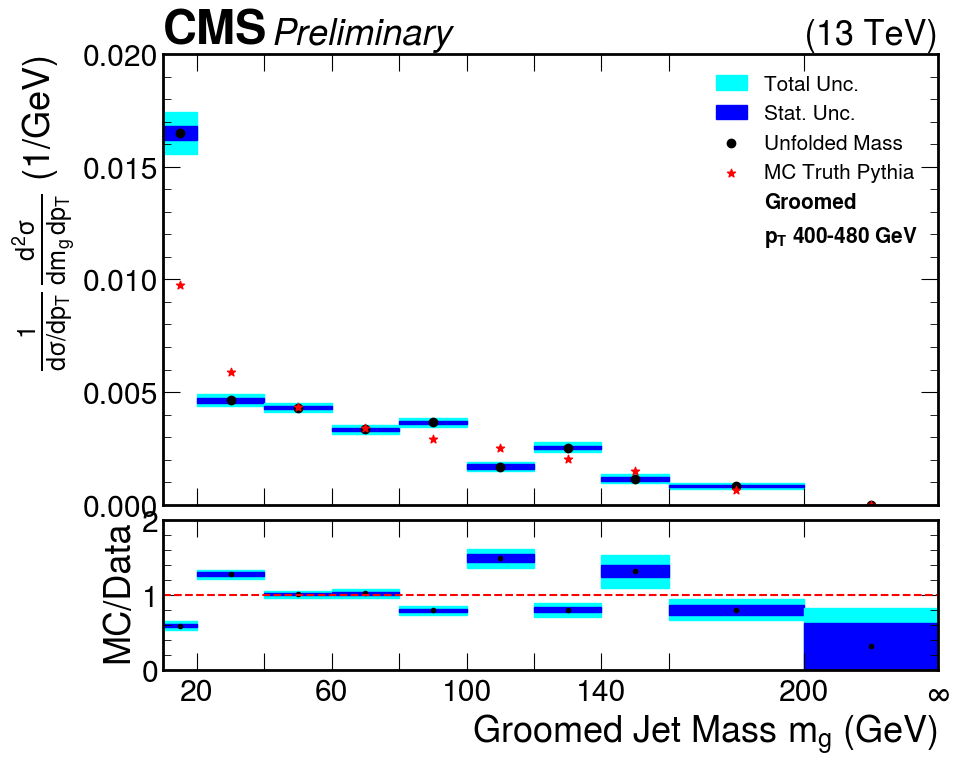

In [35]:

data_list = []
for ipt in range(3):
    
    x_data = centres_gen
    sum_i = unfolded_result[ipt].sum()
    y_data = pythia[ipt]/widths_gen/pythia[ipt].sum()
    y2_data = unfolded_result[ipt]/widths_gen/sum_i
    x_widths = widths_gen
    stat_unc_up = stat_mat[ipt]/widths_gen/sum_i
    stat_unc_down = stat_mat[ipt]/widths_gen/sum_i
    up =total_unc_up[ipt]/widths_gen/sum_i
    down = total_unc_down[ipt]/widths_gen/sum_i

    plotter = AsymmetricErrorPlot()
    plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=x_widths, y3_data = None)
    plotter.add_stat_unc(stat_unc_up, stat_unc_down)
    plotter.add_syst_unc(up, down)
    if groomed:
        custom_text = 'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        custom_text  = 'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
        
    ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= title_list[ipt])
    if not groomed:
        ax1.set_xlim(20,240)
        #ax1.set_ylim(0,240)
        ax2.set_ylim(0,2)
        fig.savefig(f'plots/results/ungroomed_{ipt}.pdf')

    else:
        ax1.set_xlim(10,240)
        ax1.set_ylim(0,0.02)
        ax2.set_ylim(0,2)
        fig.savefig(f'plots/results/groomed_{ipt}.pdf')
    edges_gen[-1] = 240
    data_list.append([edges_gen, y2_data, stat_unc_up, up, down, y_data])

9
9
widths before [   10    10    20    40    40    20    20    40 12800]
widths after [10 10 20 40 40 20 20 40 40]
masses len 9
 len values_data 9
xtick labels ['0', '', '20', '', '80', '', '140', '', 200, '$\\infty$']
Ratio [1.06173791 0.61160287 0.86505864 1.19401034 1.12529197 1.11878749
 1.05204217 0.89915105 1.73291112]
Stat Ratio [0.00740459 0.02024365 0.01686768 0.01606902 0.01689886 0.05071056
 0.05341465 0.02570893 0.06755074]
Ratio Total Unc [0.05184666 0.0619669  0.05655653 0.03635998 0.03764663 0.11549533
 0.10586763 0.0791143  0.10484494]


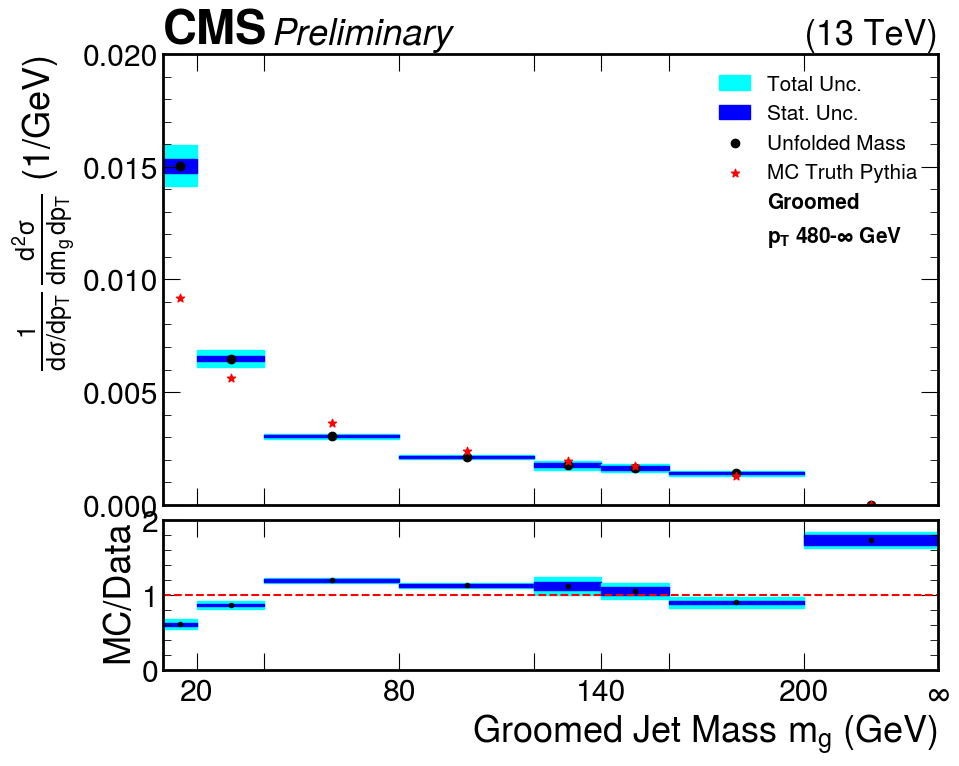

In [36]:


ipt = 3       
sum_i = unfolded_result[ipt].sum()
x_data = centres_gen_3
y_data = pythia[ipt]/widths_gen_3/pythia[ipt].sum()
y2_data = unfolded_result[ipt]/widths_gen_3/sum_i
x_widths = widths_gen_3
stat_unc_up = stat_mat[ipt]/widths_gen_3/sum_i
stat_unc_down = stat_mat[ipt]/widths_gen_3/sum_i
up = total_unc_up[ipt]/widths_gen_3/sum_i
down =  total_unc_down[ipt]/widths_gen_3/sum_i

plotter = AsymmetricErrorPlot()
plotter.add_data_points(x_data=x_data , y_data=y_data, y2_data=y2_data, x_widths=x_widths, y3_data = None)
plotter.add_stat_unc(stat_unc_up, stat_unc_down)
plotter.add_syst_unc(up, down)
if groomed:
    custom_text = 'Groomed'
    xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
    ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
else:
    custom_text  = 'Ungroomed'
    xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
    ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    
ax1, ax2, fig = plotter.plot(ylabel=ylabel, xlabel = xlabel ,custom_text=custom_text,pt_text= title_list[ipt])
if not groomed:
    ax1.set_xlim(20,240)
    ax2.set_ylim(0,2)
    fig.savefig(f'plots/results/ungroomed_{ipt}.pdf')
else:
    ax1.set_xlim(10,240)
    ax1.set_ylim(0,0.02)
    ax2.set_ylim(0,2)
    fig.savefig(f'plots/results/groomed_{ipt}.pdf')
edges_gen_3[-1] = 240
data_list.append([edges_gen_3, y2_data, stat_unc_up, up, down, y_data])

[10 10 20 20 20 20 20 20 20 40 40]
[  5.  15.  30.  50.  70.  90. 110. 130. 150. 180. 220.]
[5.15472079e-05 6.88200892e-05 1.96442574e-05 2.52540622e-05
 2.95522824e-05 3.83575677e-05 6.37168453e-05]
[10 10 20 20 20 20 20 20 20 40 40]
[  5.  15.  30.  50.  70.  90. 110. 130. 150. 180. 220.]
[0.00146511 0.00121331 0.00038104 0.00033778 0.00048583 0.00067433
 0.00078245 0.0004524 ]
[10 10 20 20 20 20 20 20 20 40 40]
[  5.  15.  30.  50.  70.  90. 110. 130. 150. 180. 220.]
[4.25051112e-02 3.13546116e-02 1.10018171e-02 5.78469697e-03
 7.27279535e-03 6.44856797e-03 8.97620118e-03 7.52296348e-03
 9.00411315e-03 5.45466067e-03 2.36756880e-05]
[10 10 20 40 40 20 20 40 40]
[  5.  15.  30.  60. 100. 130. 150. 180. 220.]
[2.69614539e-01 3.04268454e-01 1.09401344e-01 4.87343936e-02
 3.56911799e-02 8.88803796e-02 8.80079305e-02 3.60314251e-02
 1.37211590e-04]


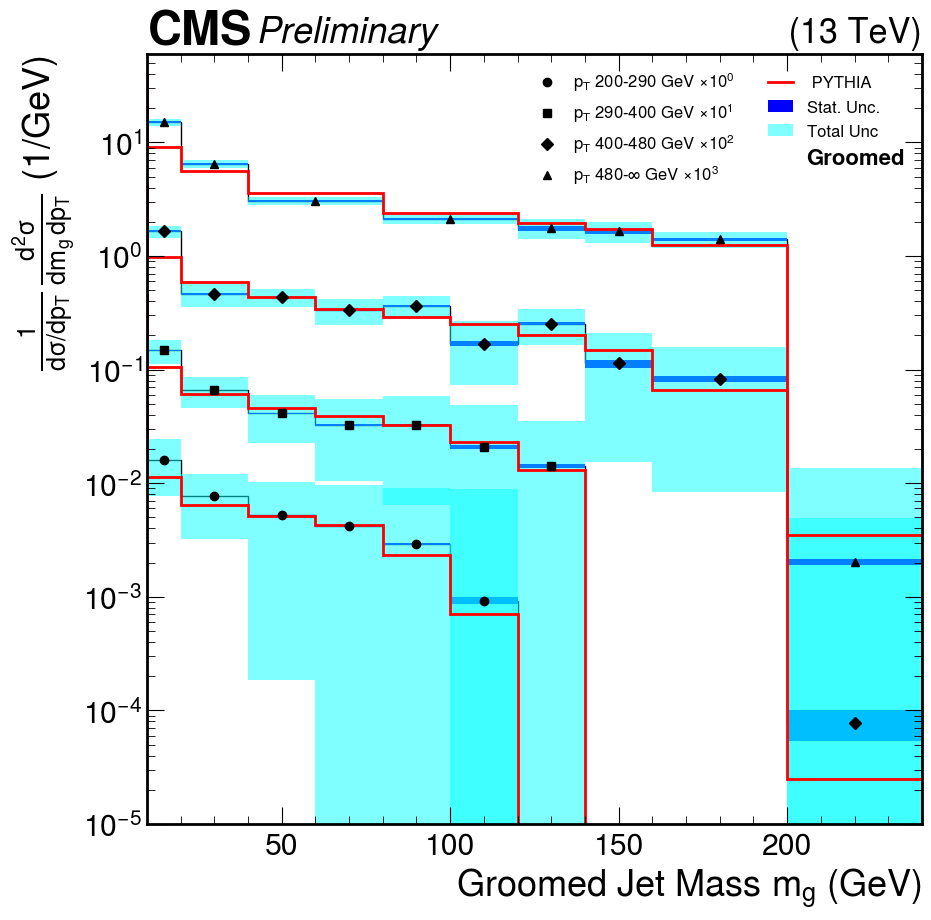

In [37]:
markers = ['o', 's', 'D', '^', 'v']
ipt = 0 
for i in range(4):
    x_data = centres_gen
    widths = widths_gen

    if i == 3:
        x_data = centres_gen_3
#widths = resp_matrix_4d.axes['mgen'].widths
        widths = widths_gen_3
        

    widths[-1] = 40
    x_data[-1] = 220
    print(widths)
    print(x_data)
    power_text = r'$\times 10^{{{}}}$'.format(i)
    pt_text =title_list[ipt] +' ' + power_text
    ipt = ipt + 1
    if i==0:
        plt.stairs(np.array(data_list[i][1][:-4])*(10**i), data_list[i][0][:-4], color = 'black' )
        plt.plot(x_data[:-4], np.array(data_list[i][1][:-4])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    elif i==1:
        plt.stairs(np.array(data_list[i][1][:-3])*(10**i), data_list[i][0][:-3], color = 'black' )
        plt.plot(x_data[:-3], np.array(data_list[i][1][:-3])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
        
    else:    
        plt.stairs(np.array(data_list[i][1])*(10**i), data_list[i][0], color = 'black' )   
            
        plt.plot(x_data, np.array(data_list[i][1])*(10**i), color = 'black' , lw = 0, marker = markers[i], label = pt_text)
    plt.xlim(0,100)
    plt.yscale('log')
    plt.ylim(10**-5, 60)
    if groomed:
        plt.xlim(10, 240)
    else:
        plt.xlim(20, 240)
    plt.ylim()
    if groomed:
        custom_text = r'Groomed'
        xlabel = "Groomed Jet Mass $m_{g}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{g} \, dp_{T}}$ (1/GeV)'
    else:
        custom_text  = r'Ungroomed'
        xlabel = "Ungroomed Jet Mass $m_{u}$ (GeV)"
        ylabel=r'$\frac{1}{d\sigma/dp_{T}} \, \frac{d^2 \sigma}{dm_{u} \, dp_{T}} (1/GeV)$'
    plt.xlabel(xlabel)
    plt.ylabel( ylabel)
    
    sys_up = np.array(data_list[i][3])*10**i 
    sys_down = np.array(data_list[i][4])*10**i 
    tot_up = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)
    tot_down = np.sqrt(np.array(sys_up)**2 + np.array(data_list[i][2])*10**i)

    if i ==0:
        plt.bar(x_data[:-4], # x
            2*np.array(data_list[i][2][:-4])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - (np.array(data_list[i][2][:-4])*(10**i)), color='b',  width=widths[:-4], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-4])*10**i)
        plt.bar(x_data[:-4], # x
            tot_up[:-4] + tot_down[:-4], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-4])*(10**i)) - tot_down[:-4], color = 'cyan', width=widths[:-4], label='Total Unc')
    elif i ==1:
        idx = 3
        plt.bar(x_data[:-idx], # x
            2*np.array(data_list[i][2][:-idx])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - (np.array(data_list[i][2][:-idx])*(10**i)), color='b',  width=widths[:-idx], label='Stat. Unc.')
        print(np.array(data_list[i][2][:-idx])*10**i)
        plt.bar(x_data[:-idx], # x
            tot_up[:-idx] + tot_down[:-idx], # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1][:-idx])*(10**i)) - tot_down[:-idx], color = 'cyan', width=widths[:-idx], label='Total Unc')
    else:
        plt.bar(x_data, # x
            2*np.array(data_list[i][2])*10**i, # heights
            #alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - (np.array(data_list[i][2])*(10**i)), color='b',  width=widths, label='Stat. Unc.')
        print(np.array(data_list[i][2])*10**i)
        plt.bar(x_data, # x
            tot_up + tot_down, # heights
            alpha=0.5, # half transparency
            bottom=(np.array(data_list[i][1])*(10**i)) - tot_down, color = 'cyan', width=widths, label='Total Unc')
for i in range(4):  
    if i == 0:
        idx = 4
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    elif i == 1:
        idx = 3
        plt.stairs(np.array(data_list[i][5][:-idx])*(10**i), data_list[i][0][:-idx], color = 'red', label = ' PYTHIA', lw = 2  )
    else:

        plt.stairs(np.array(data_list[i][5][:])*(10**i), data_list[i][0][:], color = 'red', label = ' PYTHIA', lw = 2  )
handles, labels = plt.gca().get_legend_handles_labels()
        
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
handles.append(plt.Line2D([0], [0], color='none', label=custom_text))
labels.append(custom_text)


# Add legend with the custom entry
hep.cms.label("Preliminary", data = 1,)
by_label = dict(zip(labels, handles))
leg = plt.legend(by_label.values(), by_label.keys(), fontsize = 12, ncol = 2, loc = 'upper right')
leg.get_texts()[-1].set_fontweight('bold')
leg.get_texts()[-1].set_fontsize(16)

if groomed:
    plt.savefig("plots/results/groomed_summary.pdf")
else:
    plt.savefig("plots/results/ungroomed_summary.pdf")